# Exploratory Data Analysis Use Case

**Author: Andreas Nugroho R** <br>
**Date: 29 October 2019**

The data is collected from a marketing campaign of a banking institution. The marketing campaigns were done on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

**Input variables:**<br><br>
**bank client data:**<br>
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
<br>
**related with the last contact of the current campaign:**<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
<br><br>
**other attributes:**<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
<br><br>
**social and economic context attributes:**<br>
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br> 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>
<br>
**Output variable (desired target):**<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

## Data input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('bmh')

In [2]:
data = pd.read_csv('bank-marketing-full.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data descriptions

In [3]:
data.shape

(41188, 21)

Our data has 41,188 rows and 21 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Our data seems to not have any missing value at all. Below are the statistical descriptions of our numerical and categorical vairables.

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.describe(include=['object', 'bool'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [7]:
list(set(data.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

Creating a new target variable which is in integer.

In [8]:
data.loc[(data['y'] == 'yes'), 'flag_term'] = 1
data.loc[(data['y'] == 'no'), 'flag_term'] = 0

In [9]:
data.flag_term.unique()

array([0., 1.])

In [10]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [11]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [12]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [13]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [14]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [15]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

It can be concluded that the data is fit for analysis. There are no missing values and duplicated identifiers, so the data can be analyzed further. However, it must be noted that there are 'unknown' values in some of the categorical variables.

## Numerical variables

In [16]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,flag_term
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.0


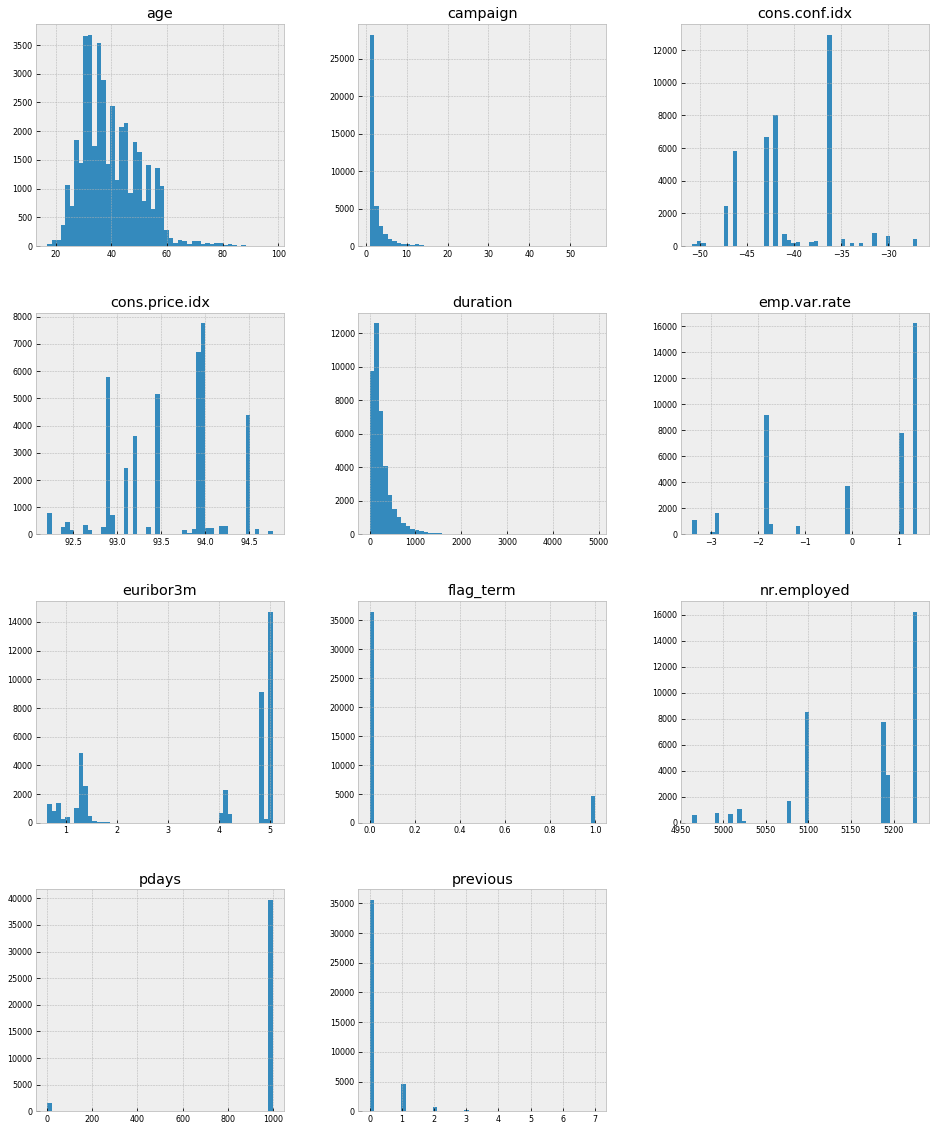

In [17]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [82]:
data_num_corr = data_num.corr()['flag_term'][:-1]
corr_list = data_num_corr[abs(data_num_corr) > 0.1].sort_values(ascending=False)
print("There are {} values which are correlated with whether the client has subscribed to a term deposit or not:\n{}".format(len(strong_corr_list), strong_corr_list))

There are 7 values which are correlated with whether the client has subscribed to a term deposit or not:
duration          0.405274
previous          0.230181
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: flag_term, dtype: float64


Duration seems to be suspiciously too good to be true. It is already expected to be highly correlated with the target, because if the customer has not been contacted at all (i.e. 0 duration), then it means the customer will not subscribe to the term deposit at all. Although, it must be noted that the longer the duration of the call, the most probable the client is to subscribe to the term deposit. Therefore, categorizing customers based on the duration of their call will not yield any new meaningful information which can help predict whether the customer will subscribe to the term deposit or not.

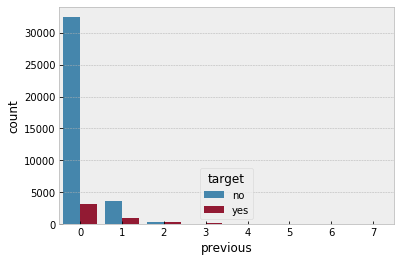

In [69]:
sns.countplot(data=data, x='previous', hue='target')

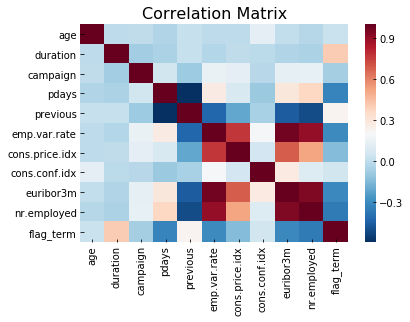

In [93]:
d_num_corr = data_num.corr()
sns.heatmap(d_num_corr, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

From the matrix above, it can be deduced that:<br>
1. Employment variation rate and number of employees per quarter are highly correlated. This makes sense as the higher the number of employees there are in the economy, the higher the variation of the types of employment.
2. The 3-month Euribor rate is also highly correlated with the number of employed people per quarter. This is more difficult to explain. Perhaps lower unemployment rate can induce the central bank to increase the Euribor rate or vice versa.

## Categorical variables

In [19]:
data_cat = data.select_dtypes(include = 'object').copy()
data_cat.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no


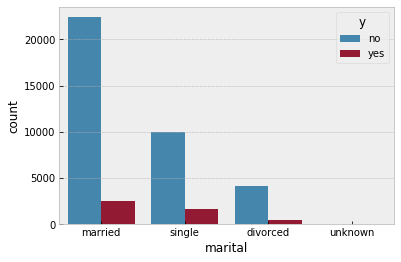

In [20]:
sns.countplot(data=data_cat, x='marital', hue='y')

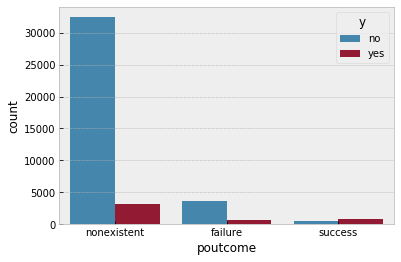

In [21]:
sns.countplot(data=data_cat, x='poutcome', hue='y')

It can be seen from the chart above that people who have been succesfully contacted in the previous campaign are now more likely to have subscribed to a term deposit. Also, the majority of our customers have never been contacted in the previous campaign. It makes sense because people who become customers during the last campaign already understand financial and other benefits of being the bank's clients. Therefore, the bank should target the successful clients from the current campaign for the next campaign.

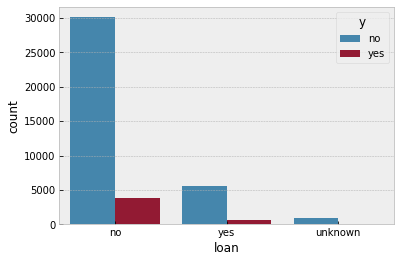

In [24]:
sns.countplot(data=data_cat, x='loan', hue='y')

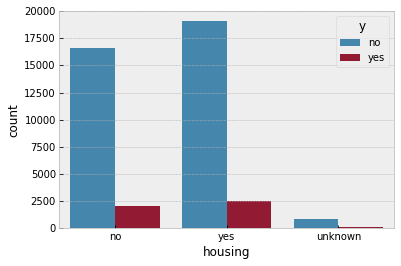

In [25]:
sns.countplot(data=data_cat, x='housing', hue='y')

### Exploring subscription rate by age category

In [55]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [57]:
cnt_age_target_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
cnt_age_target_pct = cnt_age_target_pct.transpose() 

In [58]:
age = pd.DataFrame(data['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = cnt_age_target_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

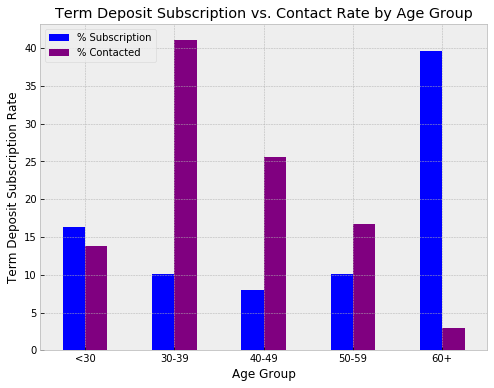

In [61]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',figsize=(8,6), color = ('blue','purple'))
plt.xlabel('Age Group')
plt.ylabel('Term Deposit Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Term Deposit Subscription vs. Contact Rate by Age Group')
plt.show()

It can be deduced from the bar chart above that the highest ratio between subscription rate and the contacted rate belongs to the age group of 60 years old and above, followed by the youngest age group and then the immediate age group below 60, which is 50-59. This indicates that the most lucrative customers are people whose age are the most approriate for pension investment. It makes sense for people above 60 to pursue such investment subscription in order to secure their life after employment. 
<br> <br>
Furthermore, it makes sense for young people who generally are not married yet to invest some of their salaries to a security asset. On the other hand, peeple between the age of 30-59 have their families to feed and therefore their demand for such investment is low compared to the other age groups.
<br> <br>
However, the bank focuses too much on contacting the age groups 30-59, although these age groups do not yield that much subscription rate. Therefore, the bank should focus instead on their most lucrative customer groups who are above 60 and below 30 years of age.

### Exploring subscription rate by education level

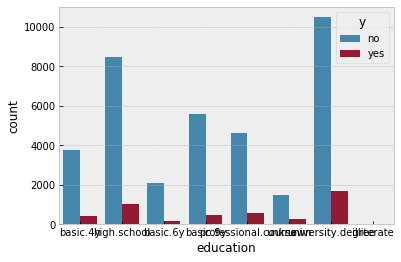

In [22]:
sns.countplot(data=data_cat, x='education', hue='y')

In [23]:
edu = pd.DataFrame(data_cat['education'].value_counts())
edu['pctg'] = edu['education']/len(data['education'])
edu

,education,pctg
university.degree,12168,0.295426
high.school,9515,0.231014
basic.9y,6045,0.146766
professional.course,5243,0.127294
basic.4y,4176,0.101389
basic.6y,2292,0.055647
unknown,1731,0.042027
illiterate,18,0.000437


The most common group to be contacted based on latest education level among our customers are university graduates, followed by people with only high school diplomas.

In [51]:
data.loc[(data['y'] == 'yes'), 'target'] = 'yes'
data.loc[(data['y'] == 'no'), 'target'] = 'no'
data['target'].unique()

array(['no', 'yes'], dtype=object)

In [62]:
cnt_edu_target_pctg = pd.crosstab(data['y'],data['education']).apply(lambda x: x/x.sum() * 100)
cnt_edu_target_pctg = cnt_edu_target_pctg.transpose()

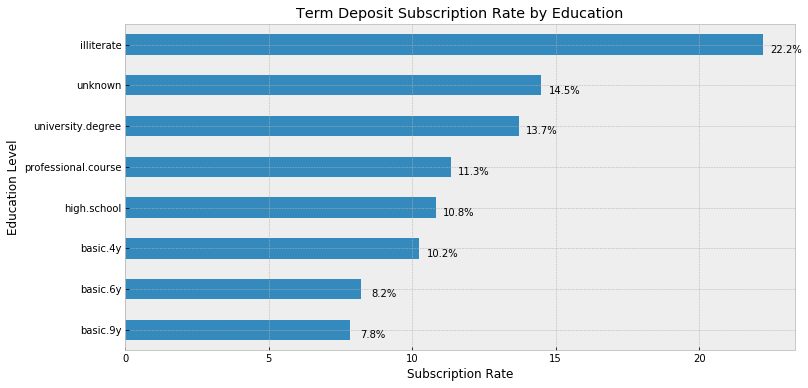

In [102]:
plot_job = cnt_edu_target_pctg['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))
                                                                               
plt.title('Term Deposit Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Level')

for rec, label in zip(plot_job.patches, cnt_edu_target_pctg['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+rec.get_height()-0.5, label+'%', ha='center', va='bottom')

From the chart above, it can be seen that the illiterate group ahs the highest subscription rate. However, there are only 18 of them, so that number is biased and should be excluded in the analysis. The same can be said about the unknown group since it is basically a group of missing values.
<br> <br>
The group with the highest subscription rate is therefore university graduates, followed by people with professional certificates. This makes sense because these people are the most probable to understand the financial benefits of investing in term deposits. The bank is also correct to target the university graduates the most. However, the bank should still attempt to contact the professional certificates group more to increase profitability since this group is less often contacted in proportion to its subscription rate. 

### Exploring subscription rate by job category

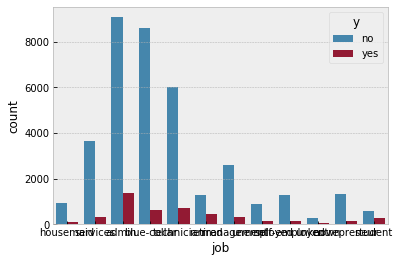

In [26]:
sns.countplot(data=data_cat, x='job', hue='y')

In [104]:
job = pd.DataFrame(data_cat['job'].value_counts())
job['pctg'] = job['job']/len(data['job'])
job

,job,pctg
admin.,10422,0.253035
blue-collar,9254,0.224677
technician,6743,0.163713
services,3969,0.096363
management,2924,0.070992
retired,1720,0.041760
entrepreneur,1456,0.035350
self-employed,1421,0.034500
housemaid,1060,0.025736
unemployed,1014,0.024619


In [97]:
cnt_job_target_pctg = pd.crosstab(data['y'],data['job']).apply(lambda x: x/x.sum() * 100)
cnt_job_target_pctg = cnt_job_target_pctg.transpose()

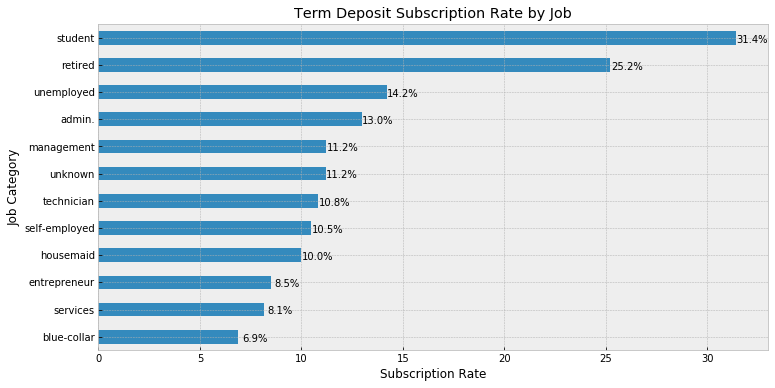

In [101]:
plot_job = cnt_job_target_pctg['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))
                                                                               
plt.title('Term Deposit Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

for rec, label in zip(plot_job.patches, cnt_job_target_pctg['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha='center', va='bottom')

From the chart above, the highest term deposit subscription rate belongs to the student group, followed by the retirees. However, students only comprise 2% of the total population. This means that it is more profitable to target this lucrative group compared to admin, blue collar, and technician groups, all of which have lower subscription rates but higher percentages by count of customers in the bank.
<br> <br>
Students are more likely to subscribe probably because they are more knowledgeable of the financial benefits of term deposits. Retired people, despite probably not being as knowledgeable as the students, have more incentives to subscribe to term deposits because they still need a steady stream of income from their accumulated wealth during their working age despite no longer working. As such, they are more likely to invest in term deposits out of necessity.

### Exploring subscription rate by month category

In [30]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

There are missing month values in 'month'. There are no January and February data. Therefore, we exclude January and February data in our analysis. 

In [31]:
# data.loc[(data['month'] == 'jan'), 'month_int'] = 1
# data.loc[(data['month'] == 'feb'), 'month_int'] = 2
data.loc[(data['month'] == 'mar'), 'month_int'] = 3
data.loc[(data['month'] == 'apr'), 'month_int'] = 4
data.loc[(data['month'] == 'may'), 'month_int'] = 5
data.loc[(data['month'] == 'jun'), 'month_int'] = 6
data.loc[(data['month'] == 'jul'), 'month_int'] = 7
data.loc[(data['month'] == 'aug'), 'month_int'] = 8
data.loc[(data['month'] == 'sep'), 'month_int'] = 9
data.loc[(data['month'] == 'oct'), 'month_int'] = 10
data.loc[(data['month'] == 'nov'), 'month_int'] = 11
data.loc[(data['month'] == 'dec'), 'month_int'] = 12

In [32]:
cnt_month_target_pctg = pd.crosstab(data['y'],data['month_int']).apply(lambda x: x/x.sum() * 100)
cnt_month_target_pctg = cnt_month_target_pctg.transpose()

In [29]:
# This is to see the ordered list of percentages of contact rate by month
month = pd.DataFrame(data_cat['month'].value_counts())
month['pctg'] = month['month']/len(data['month'])
month

,month,pctg
may,13769,0.334296
jul,7174,0.174177
aug,6178,0.149995
jun,5318,0.129115
nov,4101,0.099568
apr,2632,0.063902
oct,718,0.017432
sep,570,0.013839
mar,546,0.013256
dec,182,0.004419


In [40]:
month = pd.DataFrame(data['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = cnt_month_target_pctg['yes']
month.drop('month_int',axis = 1,inplace = True)

# order the month according to the month with the highest contact rate first
month['Month'] = [5,7,8,6,11,4,10,9,3,12]
month = month.sort_values('Month',ascending = True)

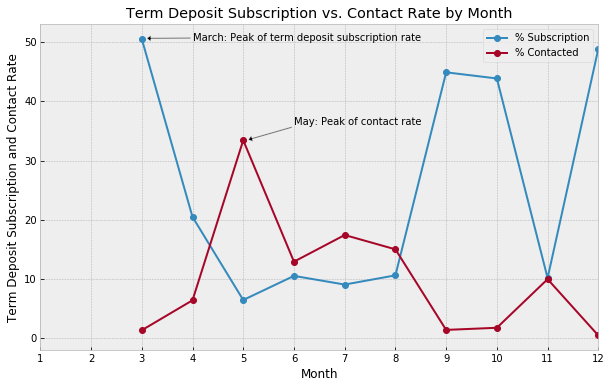

In [41]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',figsize=(10,6),marker = 'o')

plt.title('Term Deposit Subscription vs. Contact Rate by Month')
plt.ylabel('Term Deposit Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# annotating peak of contact rate
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# annotating peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak of term deposit subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

The line chart above analyzes the term deposit subscription rate with the contact rate of the bank's clients based on the month of contact. It can be seen from the chart above that term deposit subscription generally decreases during the summer and increases again during the fall and spring months, while the bank's clients are generally contacted more often during the summer months.
<br> <br>
This indicates that customers who are interested in term deposits usually tend to be contacted during the fall and spring months, while those who are not tend to be contacted during the summer months. As such, the most lucrative customers should be contacted by the bank's telemarketers during the fall and winter months.